In [ ]:
# importing libs
import numpy as np
import pandas as pd

import tensorflow as tf
import keras
from keras.layers import Input, Dense, GaussianNoise,Lambda,Dropout
from keras.models import Model
from keras import regularizers
from keras.layers import LeakyReLU
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD
from keras import backend as K
from numpy.random import rand, randn
from numpy.random import seed
from scipy.special import erfc


import sys

In [ ]:
#seed(3)
#tf.random.set_seed(3)

In [ ]:
np.set_printoptions(precision=None, threshold=sys.maxsize, edgeitems=None, linewidth=None, suppress=None, nanstr=None, infstr=None, formatter=None, sign=None, floatmode=None,  legacy=None)


In [ ]:
# for reproducing reslut
#from numpy.random import seed
#seed(1)
#from tensorflow import set_random_seed
#set_random_seed(3)

In [ ]:
# defining parameters
# define (n,k) here for (n,k) autoencoder
# n = n_channel 
# k = log2(M)  ==> so for (7,4) autoencoder n_channel = 7 and M = 2^4 = 16 
M = 256
k = np.log2(M)
k = int(k)
n_channel = 8
R = k/n_channel
print ('M:',M,'k:',k,'n:',n_channel)

M: 256 k: 8 n: 8


In [ ]:
#generating data of size N
N = 300000
label = np.random.randint(M,size=N)
label = np.array(label)
#print(label)


In [ ]:

data = ((label.reshape(-1,1) & (2**np.arange(k))) != 0).astype(int)
data = data[:,::-1]
#print(data)

In [ ]:
# creating one hot encoded vectors
#data = []
#for i in label:
 #   temp = np.zeros(M)
  #  temp[i] = 1
    #data.append(temp)

In [ ]:
# checking data shape
data = np.array(data)
print (data.shape)
#print(data)


(300000, 8)


In [ ]:
# checking generated data with it's label
temp_check = [1,23,45,67,89,96,72,250,350]
for i in temp_check:
    print(label[i],data[i])

218 [1 1 0 1 1 0 1 0]
0 [0 0 0 0 0 0 0 0]
76 [0 1 0 0 1 1 0 0]
179 [1 0 1 1 0 0 1 1]
241 [1 1 1 1 0 0 0 1]
157 [1 0 0 1 1 1 0 1]
184 [1 0 1 1 1 0 0 0]
215 [1 1 0 1 0 1 1 1]
217 [1 1 0 1 1 0 0 1]


In [ ]:
B = np.random.normal(0, 1, n_channel)
b = np.random.normal(0, 1, n_channel)

In [ ]:
def EbNo(EbNodB_):
  '''Convert Eb/No in dB to noise standard deviation'''
  EbNo = 10**(EbNodB_/10)
  return EbNo

alpha = EbNo(6)
#alpha = np.sqrt(1/(2*R*alpha))
print(alpha)

3.9810717055349722


In [ ]:
#z = np.random.uniform(size=[100,k],low=-1,high=1)
v = 1/3
b_std = v**(1/2)
#z = 2 * (rand(100,k) >= 0.5) - 1
#z = z * b_std
#print(z)

In [ ]:
# defining autoencoder and it's layer
input_signal = Input(shape=(k,))
encoded = Dense(4*k, activation='relu')(input_signal)
encoded1 = Dense(n_channel, activation='linear')(encoded)
encoded2 = Lambda(lambda x: np.sqrt(n_channel)*K.l2_normalize(x,axis=1))(encoded1)
#encoded2 = alpha*encoded2

#encoded3 =  ((B * encoded2) + (b))
encoded3= (np.random.normal(0, 1, n_channel)*encoded2 +(np.random.normal(0, 1, n_channel)))
#encoded3 = Dense(n_channel, activation='sigmoid')(encoded2)
#encoded3 = Dense(n_channel, activation=keras.layers.LeakyReLU(alpha=0.01))(encoded2)

#encoded3 = Lambda(lambda x: np.sqrt(n_channel)*K.l2_normalize(x,axis=1))(encoded2)

EbNo_train = EbNo(6)   #5.01187 #  coverted 7 db of EbNo
encoded4 = GaussianNoise(np.sqrt(1/(2*R*EbNo_train)))(encoded3)  #+ z
#encoded3 =encoded3 + z
decoded = Dense(4*k, activation='relu')(encoded4)
decoded1 = Dense(k, activation='sigmoid')(decoded)
autoencoder = Model(input_signal, decoded1)
adam = Adam(lr=0.005)
autoencoder.compile(optimizer=adam, loss='binary_crossentropy')



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# printing summary of layers and it's trainable parameters 
print (autoencoder.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
_________________________________________________________________
lambda (Lambda)              (None, 8)                 0         
_________________________________________________________________
tf.math.multiply (TFOpLambda (None, 8)                 0         
_________________________________________________________________
tf.__operators__.add (TFOpLa (None, 8)                 0         
_________________________________________________________________
gaussian_noise (GaussianNois (None, 8)                 0     

In [ ]:
# for tensor board visualization
#tbCallBack = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=True, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)

In [ ]:
batch_size =100

In [ ]:
# traning auto encoder
autoencoder.fit(data, data,
                epochs=30,
                batch_size=batch_size)

Epoch 1/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2021
Epoch 2/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1544
Epoch 3/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1388
Epoch 4/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1276
Epoch 5/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1236
Epoch 6/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1173
Epoch 7/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1149
Epoch 8/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1138
Epoch 9/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1129
Epoch 10/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1117
Epoch 11/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1100
Epoch 12/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1076
E

In [ ]:
adam1 = Adam(learning_rate=0.0008)
autoencoder.compile(optimizer=adam1, loss='binary_crossentropy')

In [ ]:
autoencoder.fit(data, data,    epochs=30,     batch_size=batch_size)

Epoch 1/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0966
Epoch 2/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0962
Epoch 3/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0967
Epoch 4/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0961
Epoch 5/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0957
Epoch 6/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0964
Epoch 7/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0960
Epoch 8/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0961
Epoch 9/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0962
Epoch 10/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0965
Epoch 11/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0964
Epoch 12/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0955
E

In [ ]:
# saving keras model
from keras.models import load_model
# if you want to save model then remove below comment
# autoencoder.save('autoencoder_v_best.model')

In [ ]:
encoder0 = Model(input_signal, encoded1)

In [ ]:
encoder1 = Model(input_signal, encoded2)

In [ ]:
# making encoder from full autoencoder
encoder = Model(input_signal, encoded3)

In [ ]:
# making decoder from full autoencoder
encoded_input = Input(shape=(n_channel,))

deco = autoencoder.layers[-2](encoded_input)

deco = autoencoder.layers[-1](deco)
decoder = Model(encoded_input, deco)

In [ ]:
# generating data for checking BER
# if you're not using t-sne for visulation than set N to 70,000 for better result 
# for t-sne use less N like N = 1500
N = 500000
test_label = np.random.randint(M,size=N)
#test_label = range(256)
#test_label = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255]
#test_label = [120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239]
#test_label=[240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255]
#test_data = []

#for i in test_label:
 #   temp = np.zeros(M)
  #  temp[i] = 1
   # test_data.append(temp)
    
#test_data = np.array(test_data)

In [ ]:
#N = 120
#test_label = range(120, 240)
test_label = np.array(test_label)
test_data = ((test_label.reshape(-1,1) & (2**np.arange(k))) != 0).astype(int)
test_data = test_data[:,::-1]
#print(test_data)

In [ ]:
#print(test_label)
#print(test_data)

In [ ]:
# checking generated data
#temp_test = 1
#print (test_data[temp_test][test_label[temp_test]],test_label[temp_test])

In [ ]:
# for plotting learned consteallation diagram

#scatter_plot = []
#for i in range(0,M):
 #   temp = np.zeros(M)
  #  temp[i] = 1
   # scatter_plot.append(encoder.predict(np.expand_dims(temp,axis=0)))
#scatter_plot = np.array(scatter_plot)
#print (scatter_plot.shape)

In [ ]:
 # use this function for ploting constellation for higher dimenson like 7-D for (7,4) autoencoder 
'''
x_emb = encoder.predict(test_data)
noise_std = np.sqrt(1/(2*R*EbNo_train))
noise = noise_std * np.random.randn(N,n_channel)
x_emb = x_emb + noise
from sklearn.manifold import TSNE
X_embedded = TSNE(learning_rate=700, n_components=2,n_iter=35000, random_state=0, perplexity=60).fit_transform(x_emb)
print (X_embedded.shape)
X_embedded = X_embedded / 7
import matplotlib.pyplot as plt
plt.scatter(X_embedded[:,0],X_embedded[:,1])
#plt.axis((-2.5,2.5,-2.5,2.5)) 
plt.grid()
plt.show()
'''

'\nx_emb = encoder.predict(test_data)\nnoise_std = np.sqrt(1/(2*R*EbNo_train))\nnoise = noise_std * np.random.randn(N,n_channel)\nx_emb = x_emb + noise\nfrom sklearn.manifold import TSNE\nX_embedded = TSNE(learning_rate=700, n_components=2,n_iter=35000, random_state=0, perplexity=60).fit_transform(x_emb)\nprint (X_embedded.shape)\nX_embedded = X_embedded / 7\nimport matplotlib.pyplot as plt\nplt.scatter(X_embedded[:,0],X_embedded[:,1])\n#plt.axis((-2.5,2.5,-2.5,2.5)) \nplt.grid()\nplt.show()\n'

In [ ]:
# ploting constellation diagram
#import matplotlib.pyplot as plt
#scatter_plot = scatter_plot.reshape(M,2,1)
#plt.scatter(scatter_plot[:,0],scatter_plot[:,1])
#plt.axis((-2.5,2.5,-2.5,2.5))
#plt.grid()
#plt.show()

In [ ]:
def frange(x, y, jump):
  while x < y:
    yield x
    x += jump

In [ ]:
N2 = 256
#test_label2 = np.random.randint(M,size=N2)
test_label2 = range(0,256)
#test_label2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119]
#test_label2 = [120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239]
#test_label2 =[240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255]
test_label2 = np.array(test_label2)
test_s = ((test_label2.reshape(-1,1) & (2**np.arange(k))) != 0).astype(int)
test_s = test_s[:,::-1]
#print(test_s)


EbNodB_ = 7 #list(frange(-2,10,0.5))
ber = [None]*(EbNodB_)
EbNo=10.0**(EbNodB_/10.0)
noise_std = np.sqrt(1/(2*R*EbNo))
noise_mean = 0
no_errors = 0
nn = N2
noise = noise_std * np.random.randn(nn,n_channel)
#encoded_signal0 = encoder0.predict(test_s) 

encoded_signal = encoder0.predict(test_s) 
nonlinear_output = encoder1.predict(test_s) 
nlo=encoder.predict(test_s)
final_signal = encoded_signal + noise
pred_final_signal =  decoder.predict(final_signal)
pred_output = tf.round(pred_final_signal)
no_errors = (pred_output != test_label)
#no_errors =  no_errors.astype(int).sum()
#ber = no_errors / nn 
#print(test_label2)
#print(encoded_signal, " ",end='')
#print(nonlinear_output)
#print(nlo)

In [ ]:
#z = np.random.uniform(size=[N,k],low=-0.25,high=0.25)
v = 1/2
b_std = v**(1/2)
#z = 2 * (rand(N,k) >= 0.5) - 1
#z = z * b_std
#print(z)

In [ ]:
# calculating BER
# this is optimized BER function so it can handle large number of N
# previous code has another for loop which was making it slow
EbNodB_range = list(frange(-2,11,1))
ber = [None]*len(EbNodB_range)
for n in range(0,len(EbNodB_range)):
    EbNo=10.0**(EbNodB_range[n]/10.0)
    noise_std = np.sqrt(1/(2*R*EbNo))
    noise_mean = 0
    no_errors = 0
    nn = N
    noise = noise_std * np.random.randn(nn,n_channel)
    encoded_signal = encoder.predict(test_data) 
    final_signal = encoded_signal + noise  #+ z
    pred_final_signal =  decoder.predict(final_signal)
    pred_output = tf.round(pred_final_signal)
    #no_errors = np.mean(pred_output != test_data)
    no_errors = tf.reduce_mean(tf.cast(tf.not_equal(tf.cast(pred_output, tf.float32), test_data),tf.float32))
    #print(no_errors)
    ber[n] = no_errors #/nn
    #no_errors = (pred_s != test_data)
    #no_errors =  no_errors.astype(int).sum()
    #print ('SNR:',EbNodB_range[n],'BER:',ber[n])
    # use below line for generating matlab like matrix which can be copy and paste for plotting ber graph in matlab
    #print(ber[n], " ",end='')
    print(tf.keras.backend.get_value(ber[n]), " ",end='')

    #print(encoded_signal)
    #print(pred_s)
    #print(pred_output)

0.21639325  0.1921495  0.167607  0.142296  0.1184735  0.09507175  0.0739705  0.054207  0.03766925  0.024199  0.014378  0.00767825  0.0036275  

In [ ]:
theoryBER = np.zeros(len(EbNodB_range),float)
for i in range(len(EbNodB_range)):
    theoryBER[i] = 0.5*erfc(np.sqrt(10**(EbNodB_range[i]/10)))

(-2.0, 12.0, 1e-05, 1.0)

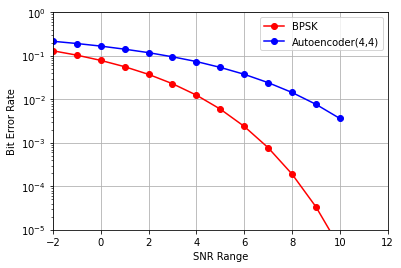

In [ ]:
# ploting ber curve
import matplotlib.pyplot as plt
from scipy import interpolate
plt.plot(EbNodB_range, theoryBER, '-ro',label='BPSK')

plt.plot(EbNodB_range, ber, '-bo',label='Autoencoder(4,4)')
plt.yscale('log')
plt.xlabel('SNR Range')
plt.ylabel('Bit Error Rate')
plt.grid()
plt.legend(loc='upper right',ncol = 1)
plt.axis([-2, 12, 1e-5, 1])


In [ ]:
# for saving figure remove below comment
#plt.savefig('AutoEncoder_2_2_constrained_BER_matplotlib')
plt.show()